In [1]:
%pylab inline
from pandas import *
import numpy 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from random import shuffle, randrange
 
def make_maze(w,h):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(randrange(w), randrange(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M

In [3]:
#Made A class to be able to keep track of the steps
class Maze():
    def __init__(self):
        self.maze_x = 10
        self.maze_y = 10
        self.maze = make_maze(self.maze_x,self.maze_y)
        self.x = 1
        self.y = 1     
Maze = Maze()

[19, 19]


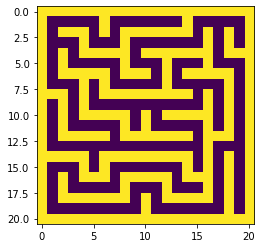

In [4]:
#maze = np.array(maze.maze)

imshow(Maze.maze)

start = [1,1]
end = [(Maze.maze_x*2)-1,(Maze.maze_y*2)-1]

Maze.maze[end[0]][end[1]] 
print(end)

In [5]:
#Created a helper function to keep track of the neighbors for each node to only make valid moves.
def validMove(position):
    valid = []
    x=position[0]
    y=position[1]
    
    up = [x-1,y]
    down = [x+1,y]
    right = [x,y+1]
    left = [x,y-1]
    
    valid.append(up)
    valid.append(down)
    valid.append(right)
    valid.append(left)
    
    return valid 

In [6]:
#Generating a random movement array [[1.1]
#When generating the random array with movements, im making sure that the movement the agent is taking,
#is a valid move by calling on my helper function valid to make sure that the next node will be a neighbor
#to the current node. Im also making sure that the agent dont move on the same node more than once.
#The rewarding for the agent is finding a path where it dont get stuck and in an sequential order.
def random(maze,solution):
    #holder = list()
    good_amount_movements = Maze.maze_x*50
    holder = []
    current = [1,1]
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    counter = 0
    X=[]
    Y=[]
    for step in solution:
        if counter > good_amount_movements:
            #imshow(Maze.maze)
            #plot(Y,X,'ow')
            break
        x,y=current
        valid = validMove(current)
        #print(holder)
        if current not in holder:
            if holder == []:
                holder.append(current)
            else:
                if holder[-1] in valid:
                    holder.append(current)
        x=x+xm[step]
        y=y+ym[step]
        if maze[x][y] == 0:
            current = [x,y]
            X.append(x)
            Y.append(y)
            counter += 1
    return holder

In [7]:
#Evaluating the solution/the movement array from from random().
#If the movevemt sequence can find the goal in the maze, it returns
#How many steps it has taken to go there.
#If the goal is not found in the movement sequence I return 10000.

#I have actually implemented two kind of fitnessfunctions, this one is rewarding the agent for reaching the 
#goal with the least amount of steps. Based on the sequential order that the random() function is returning.
def evaluateSolution(maze,solution,end):
    current = [1,1]
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    n=0
    for step in solution:
        n+=1
        x,y=current
        x = step[0]
        y = step[1]
        
        #Making sure that x and y are inside of the maze.
        if x > (Maze.maze_x*2):
            x = (Maze.maze_x*2)
        if y > (Maze.maze_y*2):
            y = (Maze.maze_y*2)
        if maze[x][y] == 0:
            current = [x,y]
            #If end has been found in the sequence of moves, return how many steps it has taken.
            if current == end:
                n = math.sqrt(((x)**2)+((y)**2))
                return n
    return 10000

#evaluateSolution(Maze.maze,numpy.random.randint(0,4,(10000)), end)
    

In [8]:
#Making of the mutants, solution is the array of movements and my is the mutationrate.
#I want the solution to be able to find a solution and then mutate on that and optimize it. 
def makeMutant(solution,my):
    #Copying the solution and loading it into nSolution variable to be able to inherit from it.
    nSolution = solution.copy()
    if numpy.random.random() > my:
        
        #Running the solution in the evaluation function to find out if it can find
        #the goal of not. The integer returned are representing if the sequence has found the goal or not. 
        #everyhing < 10000 is a sequence that have found the end.
        rating = evaluateSolution(Maze.maze,solution,end)
        

        #if rating == 0:
            #return solution
        
        #Here i just want to make sure that the sequence are able to find a solution to start with,
        #So im exstending the existing solution with another array to try to find the end.
        if rating == 10000:
            r = random(Maze.maze,numpy.random.randint(0,4,(10000)))
            nSolution += r
           
        #When the agent has founded a path, I want to exclude all the doubles in the movement sequence.
        if rating < 500:
            holder = []
            for index,a in enumerate(nSolution):
                if a not in holder:
                    holder.append(a)
                else:
                    pass
            nSolution = holder
                    
        if rating > 1000:
            r = random(Maze.maze,numpy.random.randint(0,4,(10000)))
            nSolution = r
            
    return nSolution

Generation: 0 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 1 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 2 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 3 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 4 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 5 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 6 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 7 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 8 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 9 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 10 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 11 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 12 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Generation: 13 Mean: 10000.0, Min: 10000, Steps to goal: Goal not found
Ge

Generation: 117 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 118 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 119 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 120 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 121 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 122 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 123 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 124 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 125 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 126 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 127 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 128 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Gene

Generation: 239 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 240 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 241 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 242 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 243 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 244 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 245 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 246 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 247 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 248 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 249 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 250 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Gene

Generation: 353 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 354 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 355 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 356 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 357 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 358 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 359 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 360 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 361 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 362 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 363 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 364 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Gene

Generation: 462 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 463 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 464 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 465 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 466 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 467 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 468 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 469 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 470 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 471 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 472 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 473 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Gene

Generation: 565 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 566 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 567 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 568 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 569 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 570 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 571 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 572 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 573 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 574 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 575 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 576 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Gene

Generation: 684 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 685 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 686 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 687 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 688 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 689 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 690 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 691 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 692 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 693 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 694 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 695 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Gene

Generation: 804 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 805 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 806 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 807 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 808 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 809 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 810 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 811 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 812 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 813 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 814 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 815 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Gene

Generation: 936 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 937 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 938 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 939 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 940 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 941 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 942 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 943 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 944 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 945 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 946 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 947 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Gene

Generation: 1081 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1082 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1083 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1084 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1085 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1086 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1087 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1088 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1089 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1090 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1091 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1092 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to g

Generation: 1205 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1206 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1207 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1208 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1209 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1210 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1211 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1212 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1213 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1214 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1215 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1216 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to g

Generation: 1336 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1337 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1338 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1339 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1340 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1341 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1342 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1343 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1344 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1345 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1346 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1347 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to g

Generation: 1474 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1475 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1476 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1477 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1478 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1479 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1480 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1481 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1482 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1483 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1484 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1485 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to g

Generation: 1620 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1621 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1622 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1623 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1624 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1625 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1626 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1627 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1628 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1629 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1630 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1631 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to g

Generation: 1719 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1720 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1721 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1722 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1723 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1724 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1725 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1726 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1727 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1728 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1729 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1730 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to g

Generation: 1827 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1828 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1829 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1830 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1831 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1832 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1833 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1834 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1835 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1836 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1837 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1838 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to g

Generation: 1938 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1939 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1940 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1941 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1942 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1943 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1944 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1945 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1946 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1947 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1948 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to goal: 53
Generation: 1949 Mean: 26.8700576850888, Min: 26.870057685088806, Steps to g

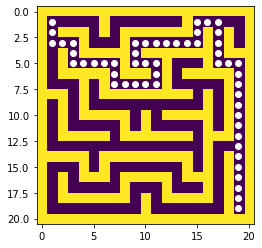

In [9]:
populationSize = 200
mutationRate = 0.7
generations = 2000
#end = [17,17]
#start = [1,1]

goal_has_been_found = False

population = list()

#Initaliazing with random movements.
for n in range(populationSize):
    r = random(Maze.maze,numpy.random.randint(0,4,(10000)))
    population.append(r)
    
Wmin=[]
Wmean=[]
Wmax = []
for generation in range(generations):
    #List that will hold all the solutions.
    W=[]
    #Iterating over the different solutions and appending its score to the W list.
    for organism in population:
        if organism is not None:
            evaluation = evaluateSolution(Maze.maze,organism,end)
        else:
            r = random(Maze.maze,numpy.random.randint(0,4,(10000)))
            evaluation = evaluateSolution(Maze.maze,r,end)
        if evaluation:
            W.append(evaluation)
    
    
    #Appending good values that I need to use in this solution based on the score from the earlier step.
    Wmin.append(min(W))
    Wmean.append(mean(W))
    Wmax.append(max(W))
    
    
    
    next_generation = list()
    best = population[W.index(min(W))]
    
    for a in range(populationSize):
        #Elite selection where I check if a population has a better mean then the best so far. 
        #if thats the case im mutating on that population and loading it into the population list.
        #If not im mutating on the so far best population.
        if W[a] < mean(best):
            if population[a] is not None:
                next_generation.append(makeMutant(population[a], mutationRate))
            else:
                #r = random(Maze.maze,numpy.random.randint(0,4,(10000)))
                r = makeMutant(best,mutationRate)
                next_generation.append(r)
        else:
            r = makeMutant(best,mutationRate)
            next_generation.append(r)
            
            
    #while len(next_generation) <= populationSize:
        #next_generation.append(makeMutant(population[W.index(min(W))],mutationRate))
        #next_generation.append(makeMutant(best,mutationRate))
    
            
    
            
            
    population = next_generation
    
        
    if Wmean[-1] == 10000:
        print(f"Generation: {generation} Mean: {Wmean[-1]}, Min: {min(W)}, Steps to goal: Goal not found")
    else:
         print(f"Generation: {generation} Mean: {Wmean[-1]}, Min: {min(W)}, Steps to goal: {len(best)}")

        
       
if Wmean[-1] == 10000:
    print("No Solution Found")


#Best path will return the same but here im stopping the path at the end for the visuals.
path = []
for p in best:
    if p == end:
        path.append(p)
        break
    else:
        path.append(p)
X = []
Y = []
for p in path:
        X.append(p[0])
        Y.append(p[1])


imshow(Maze.maze)
print("\nSteps Taken:", path, "\nSteps:", len(best))
plot(Y,X,'ow')
#print( "\len(best))


#print("\n", best)


